# Informações da Temperatura


##Coleta dos Dados / Arquivos recebidos da EMBRAPA Gado de Leite - Juiz de Fora / MG

Recebemos um total de 138 arquivos no formato csv, os arquivos são separados através do código do animal, compreeendento 4 arquivos por animal.

A estrutura interna do arquivo informa a data da medida da temperatura, hora e a temperatura, utiliza ";" como separador. 

In [12]:
# Preparação do ambiente

import pandas as pd
import glob
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta
path_temp = r'https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Temperatura/'
#path =r'/content/drive/MyDrive/MedMep/Temp_Limpos/'
filenames = glob.glob(path + "/*.csv")

Executando a leitura do arquivo recebido, identificar estrutura

In [13]:
temperatura = pd.read_csv(path_temp + "0653.csv", sep=';', encoding='latin1', engine='python',  names=["Data", "Hora", "Temperatura"])

In [14]:
temperatura

,Data,Hora,Temperatura
0,NaN,17/09/2017,NaN
1,Timezone,-3,NaN
2,NaN,NaN,NaN
3,Serial No.,454F200001AD8521,NaN
4,Location:,exp cromo,NaN
...,...,...,...
268,17/09/2017,18:40,"26,625"
269,17/09/2017,19:10,"26,25"
270,17/09/2017,19:40,26
271,17/09/2017,20:10,"25,75"


In [15]:
temperatura.describe

<bound method NDFrame.describe of            Data              Hora Temperatura
0           NaN        17/09/2017         NaN
1      Timezone                -3         NaN
2           NaN               NaN         NaN
3    Serial No.  454F200001AD8521         NaN
4     Location:         exp cromo         NaN
..          ...               ...         ...
268  17/09/2017             18:40      26,625
269  17/09/2017             19:10       26,25
270  17/09/2017             19:40          26
271  17/09/2017             20:10       25,75
272       -end-               NaN           0

[273 rows x 3 columns]>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


### Extrair do nome do arquivo o do Id_Animal

In [16]:
# Ler parte do nome do arquivo
b = re.search(r'(\d+)', 'path_temp + "0653.csv"')
b[1]

'0653'

In [17]:
temp_df = pd.DataFrame({'Data':[], 'Hora':[], 'Temperatura':[]})
for filename in filenames:
  a = pd.read_csv(filename, sep=';', encoding='latin1', engine='python',  names=["Data", "Hora", "Temperatura"])
  #print(type(a))
  #if str(a['Data'].iloc[0])=="nan":
    #print('aqui')
   # a = pd.read_csv(filename, skiprows=7, skipfooter=1, sep=';', encoding='latin1', engine='python',  names=["Data", "Hora", "Temperatura"])
  a['Id_Animal']= re.search(r'(\d+)', filename)[1]
  #print(a)
  print(a['Data'].iloc[0])
  temp_df = pd.concat([temp_df, a])
  #temp_df['Id_Animal'] = filename  # Ainda não está OK - está ficando o nome do último arquivo somente
  #print(filename)

# Nova seção

In [ ]:
temp_df['Id_Animal'] = temp_df['Id_Animal'].astype(int)     #converte toda a coluna para inteiro
temp_df['Temperatura'] = temp_df['Temperatura'].astype(str) #converte toda a coluna para string
temp_df['Temperatura'] = temp_df['Temperatura'].apply(lambda x:x.replace(",",".")) #replace , por .
temp_df['Temperatura'] = temp_df['Temperatura'].astype(float) #converte toda a coluna para float
temp_df

In [ ]:
temp_df.to_csv('/content/drive/MyDrive/MedMep/Temp_Limpos/Temp_Unificado.csv')

#Dashboard

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/InstitutodaVinci3/Vancouver/master/Temp_Unificado.csv')
df.head()

,Unnamed: 0,Data,Hora,Temperatura,Id_Animal
0,0,12/09/2017,08:40,31.875,653
1,1,12/09/2017,09:10,18.375,653
2,2,12/09/2017,09:40,18.375,653
3,3,12/09/2017,10:10,19.125,653
4,4,12/09/2017,10:40,38.625,653


In [ ]:
temp_df.groupby(["Data","Id_Animal"]).Temperatura.mean()

Data        Id_Animal
01/08/2017  2416         216468.750000
            2431         216438.541667
            2483         222921.875000
            2560         233987.500000
            2648         220528.125000
                             ...      
31/07/2017  4426         224298.958333
            4453         217719.791667
            4465         211534.375000
            4475         181118.750000
            4477         241077.083333
Name: Temperatura, Length: 845, dtype: float64

In [ ]:
temp_df.groupby(["Data","Id_Animal"]).Temperatura.describe()

In [ ]:
temp_df.loc[(temp_df['Id_Animal'] == 4498) &(temp_df['Data']=='18/09/2017')]

In [ ]:
import plotly.express as px
df=temp_df.loc[(temp_df['Id_Animal'] == 4498) &(temp_df['Data']=='18/09/2017')]
fig = px.line(df, x='Hora', y="Temperatura")
fig.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(temp_df['Temperatura'], temp_df['Data'], color='green')
#plt.scatter(x, y, color='red')
plt.show()

In [ ]:
temp_df.groupby(["Data","Id_Animal"]).Temperatura.describe()

count       mean        std  ...      50%       75%     max
Data       Id_Animal                               ...                           
01/08/2017 2416        48.0  38.953125   0.230092  ...  39.0000  39.12500  39.500
           2431        48.0  39.236979   0.311823  ...  39.2500  39.37500  40.000
           2483        48.0  38.703125   0.158166  ...  38.7500  38.75000  39.000
           2560        48.0  38.968750   0.216506  ...  39.0000  39.12500  39.375
           2648        48.0  39.046875   0.181646  ...  39.0000  39.12500  39.500
           2710        48.0  39.020833   0.177402  ...  39.0000  39.12500  39.500
           3437        48.0  39.242188   0.195369  ...  39.2500  39.37500  39.625
           3458        48.0  38.786458   0.598623  ...  38.8750  39.12500  39.500
           3460        48.0  38.877604   0.274697  ...  38.8750  39.00000  39.375
           3530        48.0  39.054688   0.174708  ...  39.0000  39.12500  39.500
           3600        48.0  39.317708   0.251271  ...  39.2500  39.50000  39.875
           3644        48.0  39.140625   0.284372  ...  39.1250  39.37500  39.750
           3785        48.0  39.601562   0.510304  ...  39.5000  40.03125  40.750
           4426        48.0  39.432292   0.184070  ...  39.3750  39.50000  40.000
           4453        48.0  38.625000   0.588001  ...  38.7500  38.87500  39.125
           4465        48.0  39.046875   0.204056  ...  39.0000  39.12500  39.500
           4475        48.0  39.046875   0.231532  ...  39.0000  39.25000  39.625
           4477        48.0  38.919271   0.177695  ...  38.8750  39.00000  39.250
01/10/2017 653         47.0  26.468085   1.915055  ...  27.1250  27.50000  30.875
           2406        48.0  26.453125   1.862748  ...  27.1250  27.50000  30.875
           2468        48.0  26.632812   2.064680  ...  27.3125  27.75000  31.750
           2567        48.0  26.322917   1.896040  ...  27.0625  27.37500  30.875
           2581        48.0  25.992188   4.320397  ...  27.1875  27.62500  31.500
           2623        48.0  38.875000   0.174886  ...  38.8750  39.00000  39.250
           2624        48.0  26.096354   4.265401  ...  27.3125  27.65625  30.875
           2662        48.0  26.276042   1.813249  ...  27.0000  27.37500  30.500
           3424        48.0  26.067708   4.257421  ...  27.2500  27.62500  31.000
           3475        48.0  26.609375   1.863462  ...  27.2500  27.62500  31.000
           3500        48.0  26.447917   1.901293  ...  27.0625  27.53125  30.875
           3579        48.0  26.325521   1.875574  ...  27.0000  27.37500  30.750
           4021        48.0  26.005208   4.286371  ...  27.1875  27.62500  31.000
           4412        48.0  26.299479   1.823447  ...  27.0000  27.37500  30.375
           4421        48.0  26.333333   2.079749  ...  27.0000  27.50000  31.500
           4448        48.0  26.083333   1.691526  ...  26.8750  27.15625  29.500
           4498        48.0  25.648438   4.221561  ...  26.8125  27.25000  30.625
02/08/2017 2416        48.0  38.958333   0.228218  ...  38.9375  39.12500  39.500
           2431        48.0  39.153646   2.385578  ...  39.5000  40.00000  40.375
           2483        48.0  38.419271   1.857004  ...  38.6250  38.75000  39.125
           2560        48.0  38.906250   0.229911  ...  39.0000  39.00000  39.250
           2648        48.0  38.695312   2.506893  ...  39.0000  39.25000  39.500
           2710        48.0  39.000000   0.367387  ...  39.0000  39.12500  39.375
           3437        48.0  39.125000   0.244623  ...  39.1250  39.25000  39.625
           3458        48.0  38.971354   1.057911  ...  39.0000  39.50000  40.375
           3460        48.0  38.716146   0.802150  ...  38.7500  39.00000  39.875
           3530        48.0  38.669271   3.024665  ...  39.0000  39.25000  39.875
           3600        48.0  39.221354   0.285090  ...  39.1250  39.37500  39.875
           3644        48.0  38.692708   3.585205  ...  39.1250  39.37500  40.250
    

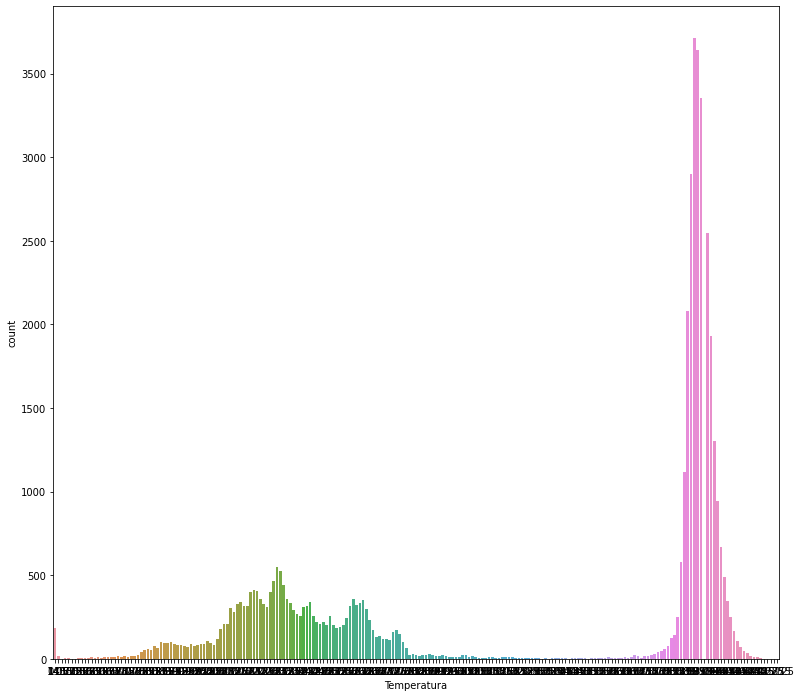

In [ ]:
plt.figure(figsize=(13,12))
sns.countplot(data=temp_df,x='Temperatura')

In [ ]:
pd.set_option("max_rows", None)

In [ ]:
temp_df['Temperatura'].groupby(temp_df['Id_Animal']).value_counts()

Id_Animal  Temperatura
653        39.125          76
           38.500          74
           38.875          71
           39.000          68
           38.750          65
           39.250          59
           38.625          57
           22.875          42
           38.375          41
           23.000          36
           38.250          35
           39.375          33
           22.750          31
           21.875          26
           25.750          25
           38.125          25
           25.875          24
           38.000          24
           23.125          23
           22.000          22
           25.625          22
           26.000          21
           26.250          21
           23.375          20
           22.625          19
           22.250          18
           22.375          17
           22.500          17
           23.250          17
           24.000          16
           27.375          16
           22.125          15
           24.125